# Session 12: Simulation Modeling I

## 1. Generating Samples

In [1]:
from scipy.stats import norm
import numpy as np
np.random.seed(0)
dist=norm(100,30)
dist.rvs()

152.92157037902993

In [2]:
dist.rvs(size=3)

array([112.00471625, 129.36213952, 167.22679598])

In [3]:
import pandas as pd
data=dist.rvs(size=10000)
demand=pd.Series(data)
demand.head()

0    156.026740
1     70.681664
2    128.502653
3     95.459284
4     96.903434
dtype: float64

In [4]:
demand.mean()

99.43350357671024

In [5]:
np.mean(data)

99.43350357671024

In [6]:
demand.std()

29.619606530616284

In [7]:
np.std(data)

29.618125513263394

In [8]:
(demand<100).mean()

0.5109

In [9]:
np.mean(data<100)

0.5109

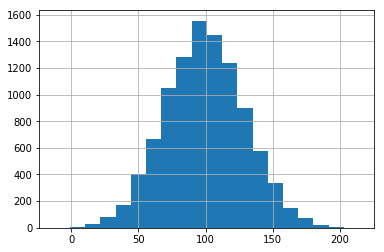

In [33]:
demand.hist(bins=20)

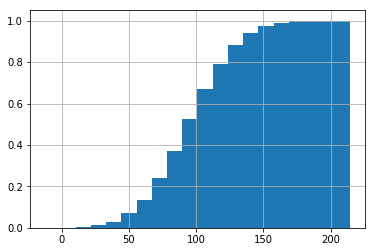

In [11]:
demand.hist(bins=20,density=True,cumulative=True)

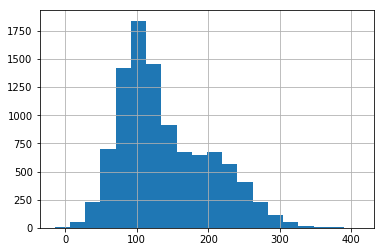

In [12]:
distA=norm(200,50)
distB=norm(100,30)
from scipy.stats import bernoulli
distSegment=bernoulli(0.4)
data=[]
for i in range(10000):
    segment=distSegment.rvs()
    if segment==1:
        value=distA.rvs()
    else:
        value=distB.rvs()
    data.append(value)
demand2=pd.Series(data)
demand2.hist(bins=20)

In [13]:
values=[1,2.5,3.5]
probs=[0.3,0.5,0.2]
np.random.choice(values,p=probs)

1.0

In [14]:
np.random.choice(values,p=probs,size=10)

array([2.5, 3.5, 1. , 2.5, 1. , 2.5, 1. , 2.5, 1. , 1. ])

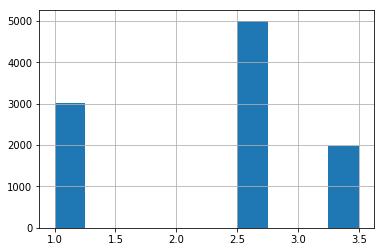

In [15]:
samples=pd.Series(np.random.choice(values,p=probs,size=10000))
samples.hist()

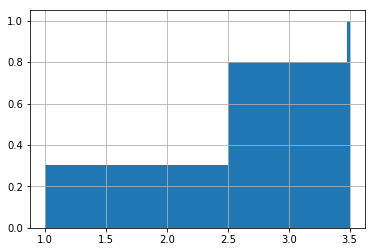

In [16]:
samples.hist(bins=100,density=True,cumulative=True)

**Q1-a:** Generate 10000 samples of a uniform distribution between 1 and 3 and plot the histogram, as well as the empirical CDF. Calculate the mean and standard deviation of the samples, as well as the proportion between 2 and 2.5 (inclusive).

**Q1-b:** Generate 100 samples of a binomial distrubution with $n=10$ and $p=0.3$. Calculate the mean and standard deviation of the sample and compare with what it should be from the formula. Plot a histogram with 50 bins. Repeat with 10,000 samples.

**Q2:** You are tasked with forecasting demand for a new product. Based on past data and your knowledge of the product, you estimate that the product quality will be Amazing with probability 0.1, Mediocre with probability 0.5, and Terrible with probability 0.4. You model the demand as normally distributed, with mean and standard deviation depending on the product quality as follows.

| Prod. Quality: | Amazing | Mediocre | Terrible |
|--|--|--|--|
|$\mu$| 10000 | 5000 | 1000 |
|$\sigma$| 2000 | 1000 | 300 |

Create a `Series` called "forecast" with 10,000 samples of the demand forecast, and compute the mean and standard deviation of the samples, as well as the probability that demand is more than 6000. Finally, plot a histogram of the samples with 100 bins, as well as the empirical CDF.

Sample mean: 3881.302260377957
Sample standard deviation: 2939.8432697511016
Probability demand more than 6000: 0.1781


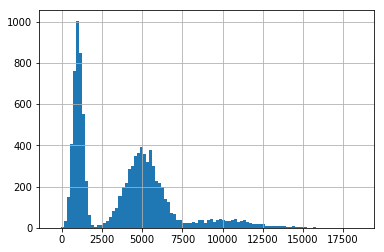

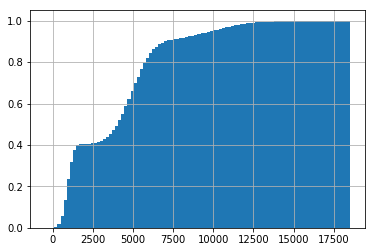

**Q3:** Nadeem is a car salesperson who faces the following incentive scheme at the dealership where he works. For each month, there is a "target profit" that the dealership sets for the month. If he makes more profit for the dealership that month than the target, then he receives a 20% bonus on the amount of profit over the target. However, if he does not meet the target, he receives no bonus.  For example, if the target is 80,000 and he makes 100,000 of profit, then he receives a 4,000 bonus that month. However, if he makes 70,000, then he receives zero bonus that month. Nadeem would like to understand the distribution of his monthly bonus.

Nadeem estimates that the number of cars he sells is binomial distributed with $n=200$ and $p=0.2$. On every car he sells, the amount of profit he makes for the dealership is normally distributed with $\mu=3000$ and $\sigma=1000$, and the profit from each car is independent of another.

Create a `Series` called "monthlyBonus" with 10,000 samples of his monthly bonus. Compute the mean, the standard deviation, the probability the bonus is less than 5000, and plot a histogram with 50 bins as well as the empirical CDF.

Mean is 7966.691715092367
Standard deviation is 3595.714686711149
Probability less than 5000 is 0.2058


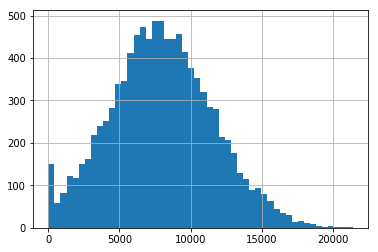

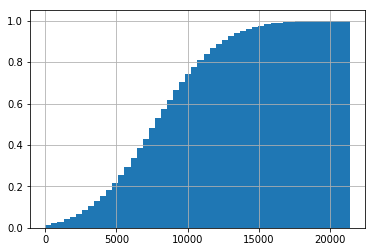

**(Bonus)** This question asks you to illustrate the Central Limit Theorem (CLT) by example. Consider the following distribution,
$$X = \begin{cases} 3 & \text{ with probability $0.4$,} \\ 5 & \text{ with probability $0.1$,} \\ 9 & \text{ with probability $0.5$.} \end{cases}$$

Define $Y_n$ to be the sum of $n$ independent random variables with the above distribution. Create 10000 samples of $Y_1$, $Y_5$, $Y_{30}$, $Y_{100}$, and $Y_{1000}$ and plot their histograms (with 30 bins). You should be able to see the histograms converging to a Bell curve as $n$ increases. 

The Central Limit Theorem (CLT) says that this phenomenon always happens, regardless of the distribution of $X$. Moreover, it still takes place even if the $n$ independent random variables do not have the same distribution, as long as each term in the sum is "small" relative to the whole. (For a precise mathematical formulation of the CLT in the case with non-identical random variables, search for Lyapunov or Lindeberg CLT on Wikipedia.)